# Notebook for preparing and saving TSP graphs

In [9]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
if not os.path.isfile('tsp30-50.zip'):
    print('downloading TSP..')
    !curl https://www.dropbox.com/s/3wtbbunpoyd8eor/tsp30-50.zip?dl=0 -o tsp30-50.zip -J -L -k
    !unzip tsp30-50.zip 
else:
    print('File already downloaded')


if not os.path.isfile('BP/BPmatch_damp_bayati.zip'):
    print('downloading BP..')
    !mkdir BP
    !curl https://www.dropbox.com/s/4lye6u98gly5fkx/BPmatch_damp_bayati.zip?dl=0 -o BPmatch.zip -J -L -k
    !unzip BPmatch_damp_bayati.zip
    !cd ..
else:
    print('File already downloaded')

downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137    0   137    0     0    292      0 --:--:-- --:--:-- --:--:--   293
100   318  100   318    0     0    310      0  0:00:01  0:00:01 --:--:--     0
  0     0    0  1076    0     0    779      0 --:--:--  0:00:01 --:--:--   779
100 8880k  100 8880k    0     0  3206k      0  0:00:02  0:00:02 --:--:-- 8547k
Archive:  tsp30-50.zip
  inflating: ../tsp30-50_test.txt    
  inflating: ../tsp30-50_train.txt   
  inflating: ../tsp30-50_val.txt     


In [12]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

/home


In [59]:
import pickle

%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader

from data.data import LoadData
from data.TSP import TSP, TSPDatasetDGL, TSPDataset

DATASET_NAME = 'tsp30-50'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Convert to DGL format and save with pickle

In [12]:
start = time.time() 

dataset = TSPDatasetDGL(DATASET_NAME,use_matching=use_matching) 

print('Time (sec):',time.time() - start) # ~ 30min

preparing all graphs for the TRAIN set...
preparing all graphs for the VAL set...
preparing all graphs for the TEST set...
Time (sec): 1608.8731424808502


In [13]:
print('Node features dimensionality:',dataset.train[0][0].ndata['feat'][0].size(0))
#should be 2, corresponding to the coordinates

print('Edge features dimensionality:',dataset.train[0][0].edata['feat'][0].size(0))
#should be 2 if we are adding BP predictions, 1 (just the euclidean distance) otherwise

Node features dimensionality: 2
Edge features dimensionality: 1


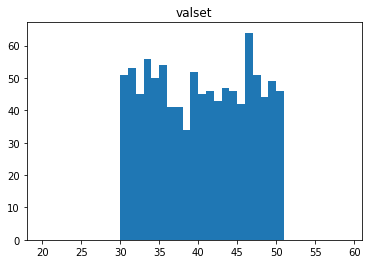

nb/min/max : 1000 30 50


In [14]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=range(20,60))
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(), graph_sizes.max().long().item())
    
# plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
# plot_histo_graphs(dataset.test,'testset')


In [27]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


10000
1000
1000
(Graph(num_nodes=45, num_edges=1088,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [28]:
start = time.time()

with open(f'data/TSP/{DATASET_NAME}.pkl','wb') as f:
    pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # ~ 5s


Time (sec): 4.683377504348755


# Test load function

In [50]:
start = time.time()
print("[I] Loading dataset ")
name = 'tsp30-50'
with open('data/TSP/tsp30-50.pkl',"rb") as f:
    f = pickle.load(f)
    train = f[0]
    test = f[1]
    val = f[2]
print('train, test, val sizes :',len(train),len(test),len(val))
print("[I] Finished loading.")
print("[I] Data load time: {:.4f}s".format(time.time()-start))

[I] Loading dataset 
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 6.8008s


In [68]:
dataset = LoadData(DATASET_NAME)  # ~ 6s
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset tsp30-50...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 6.8638s


In [69]:
trainset = trainset.subsample(10)

In [70]:
start = time.time()

batch_size = 10
collate = TSPDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start)  # ~ 0.0002s


Time (sec): 0.00021028518676757812


In [71]:
type(trainset)

list

# Plot TSP samples

In [31]:
from scipy.spatial.distance import pdist, squareform
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx


def _edges_to_node_pairs(W):
    """Helper function to convert edge matrix into pairs of adjacent nodes.
    """
    pairs = []
    for r in range(len(W)):
        for c in range(len(W)):
            if W[r][c] == 1:
                pairs.append((r, c))
    return pairs

def plot_tsp(x_coord, W, tour):
    """
    Helper function to plot TSP tours.
    
    Args:
        x_coord: Coordinates of nodes
        W: Graph as adjacency matrix
        tour: Predicted tour
        title: Title of figure/subplot
    """
    W_val = squareform(pdist(x_coord, metric='euclidean'))
    G = nx.from_numpy_matrix(W_val)
    
    pos = dict(zip(range(len(x_coord)), x_coord))
    
    adj_pairs = _edges_to_node_pairs(W)
    
    tour_pairs = []
    for idx in range(len(tour)-1):
        tour_pairs.append((tour[idx], tour[idx+1]))
    tour_pairs.append((tour[idx+1], tour[0]))
    
    node_size = 50/(len(x_coord)//50)
    
    nx.draw_networkx_nodes(G, pos, node_color='b', node_size=node_size)
    nx.draw_networkx_edges(G, pos, edgelist=adj_pairs, alpha=0.25, width=0.1)
    nx.draw_networkx_edges(G, pos, edgelist=tour_pairs, alpha=1, width=1.5, edge_color='r')

In [32]:
filename = f"data/TSP/{DATASET_NAME}_test.txt"
file_data = open(filename, "r").readlines()
num_neighbors = 25

50
[0, 46, 20, 47, 11, 17, 14, 40, 19, 10, 5, 32, 30, 43, 23, 41, 39, 24, 35, 26, 27, 1, 44, 42, 37, 9, 38, 36, 3, 28, 16, 12, 48, 31, 15, 8, 21, 49, 2, 18, 34, 22, 29, 7, 13, 25, 33, 6, 45, 4]


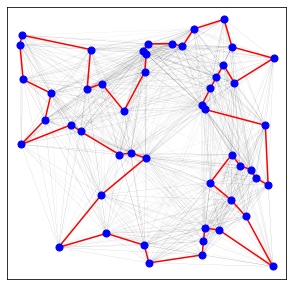

Stop (y/n)
y


In [33]:
for graph_idx, line in enumerate(file_data):
    line = line.split(" ")  # Split into list
    num_nodes = int(line.index('output')//2)

    # Convert node coordinates to required format
    nodes_coord = []
    for idx in range(0, 2 * num_nodes, 2):
        nodes_coord.append([float(line[idx]), float(line[idx + 1])])

    # Compute distance matrix
    W_val = squareform(pdist(nodes_coord, metric='euclidean'))
    # Determine k-nearest neighbors for each node
    knns = np.argpartition(W_val, kth=num_neighbors, axis=-1)[:, num_neighbors::-1]
    
    W = np.zeros((num_nodes, num_nodes))
    # Make connections 
    for idx in range(num_nodes):
        W[idx][knns[idx]] = 1

    # Convert tour nodes to required format
    # Don't add final connection for tour/cycle
    tour_nodes = [int(node) - 1 for node in line[line.index('output') + 1:-1]][:-1]

    # Compute an edge adjacency matrix representation of tour
    edges_target = np.zeros((num_nodes, num_nodes))
    for idx in range(len(tour_nodes) - 1):
        i = tour_nodes[idx]
        j = tour_nodes[idx + 1]
        edges_target[i][j] = 1
        edges_target[j][i] = 1
    # Add final connection of tour in edge target
    edges_target[j][tour_nodes[0]] = 1
    edges_target[tour_nodes[0]][j] = 1
    
    if num_nodes == 50:
        print(num_nodes)
        print(tour_nodes)

        plt.figure(figsize=(5,5))
        plot_tsp(nodes_coord, W, tour_nodes)
#         plt.savefig(f"img/tsp{num_nodes}_{graph_idx}.pdf", format='pdf', dpi=1200, bbox_inches='tight')
        plt.show()
        print("Stop (y/n)")
        if input() == 'y':
            break